In [2]:
import seaborn as sns
import pandas as pd
import mne
import os

In [3]:
# Read files
data_objects = []
for f in os.listdir('data'):
    data_objects.append(mne.io.read_raw_edf(f'data/{f}', verbose='CRITICAL'))

In [4]:
# Obtain the total study times for each individual (in hours)
total_examined_times = pd.DataFrame([i.times.max()/3600 for i in data_objects])

In [5]:
# Get mean study time
total_examined_times.mean()

0    6.93442
dtype: float64

In [6]:
# Obtain studied signals
ch_names = [i.ch_names for i in data_objects]

In [7]:
# Obtain studied signals that appear in all individuals
s = set.intersection(*[set(i) for i in ch_names])
print(s)

{'RightEye', 'Lefteye', 'EMG', 'ECG', 'BodyPos', 'SpO2', 'Pulse', 'Sum', 'C3A2', 'Flow', 'ribcage', 'abdo', 'C4A1'}


In [8]:
# Obtain the time in between observations
pd.DataFrame(data_objects[0].times).diff().iloc[1]

0    0.007812
Name: 1, dtype: float64

In [9]:
# Obtain average number of observations by patient
pd.DataFrame([len(i.times) for i in data_objects]).mean()

0    3195381.76
dtype: float64

In [10]:
dat0 = data_objects[0].get_data()

<AxesSubplot: >

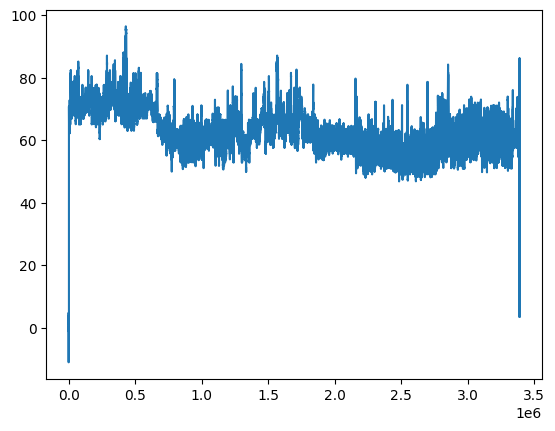

In [12]:
sns.lineplot(dat0[data_objects[0].ch_names.index('Pulse'),:])